In [7]:
from fetchnews import fetch_google_news
from fetchnews import sentiment_analysis
from analytics import time_series_sentiment, sentiment_returns_analysis, get_daily_news_count, news_count_volatility_analysis


import pandas as pd
import numpy as np
from pygooglenews import GoogleNews
import warnings
warnings.filterwarnings('ignore')

from transformers import pipeline
import matplotlib.pyplot as plt

In [8]:
query = "Netflix"
start_date = "2025-09-01"
end_date = "2025-12-25"

Function sentiment_analysis takes in:

1) query: The target keyword
2) start_date
3) end_date
4) label/score: label gives "POSITIVE" or "NEGATIVE"; score gives a confidence score for "POSITIVE" sentiment.

and gives out a dataframe with the top news and sentiment scores/labels for each day



In [9]:
df = sentiment_analysis(query,start_date,end_date,"label")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


In [13]:
df

,2025-9-1,2025-9-2,2025-9-3,2025-9-4,2025-9-5,2025-9-6,2025-9-7,2025-9-8,2025-9-9,2025-9-10,...,2025-12-16 Analysis,2025-12-17 Analysis,2025-12-18 Analysis,2025-12-19 Analysis,2025-12-20 Analysis,2025-12-21 Analysis,2025-12-22 Analysis,2025-12-23 Analysis,2025-12-24 Analysis,2025-12-25 Analysis
0,The Best New TV Shows Streaming In September 2...,11 Best New Shows on Netflix: September 2025’s...,'Unknown Number: The High School Catfish' shoc...,‘Cover-Up’ Review: Seymour Hersh and the Secre...,NFL: Cowboys beat Commanders as Netflix pull o...,10 Great Movies New To Netflix In September 20...,Paramount Launches Hostile Bid Offer to Kill N...,Is the Netflix-Warner Bros. deal a sure thing?...,"Tom Brady talks Netflix roast, 'most rewarding...",Stranger Things Season 5 Vol 2 Review and Rele...,...,NEGATIVE,NEGATIVE,POSITIVE,POSITIVE,POSITIVE,POSITIVE,NEGATIVE,NEGATIVE,NEGATIVE,NEGATIVE
1,Trump comments raise doubts over Netflix's $72...,Trump Just Threw a Wrench Into Netflix's $72 B...,Netflix will let users customize and share cli...,Sneak Peek: Netflix House Begins Work On Massi...,A new Netflix doc offers an intimate portrait ...,Warner Bros. Board Poised to Back Netflix as P...,Netflix September 2025 Release Guide: Must-Wat...,How about Edge of Tomorrow on repeat forever -...,"Video: ""Dudes"" - Official Trailer - Netflix - ...",Netflix Adds Amazon Ads To DSP Partners 09/10/...,...,POSITIVE,NEGATIVE,NEGATIVE,POSITIVE,POSITIVE,NEGATIVE,NEGATIVE,POSITIVE,POSITIVE,NEGATIVE
2,Netflix Unveils Evolution of K-Unscripted: New...,Who buys Warner and who stops it? Netflix-Para...,All the new movies and TV shows streaming in S...,Streaming Platforms Continue to Bet Big on Gam...,1 Reason Wall Street Is Obsessed With Netflix ...,The Best Movies and TV Shows Coming to Netflix...,"65 TV Shows Canceled in 2025, So Far: 6 From N...",‘Wednesday’ Season 3 Needs To Break Netflix’s ...,‘The Rip’: Matt Damon & Ben Affleck Lead Netfl...,Everything You Need to Know About ‘Black Rabbi...,...,NEGATIVE,POSITIVE,NEGATIVE,NEGATIVE,NEGATIVE,NEGATIVE,NEGATIVE,NEGATIVE,NEGATIVE,NEGATIVE
3,"Raw results, Sept. 1, 2025: Jimmy Uso rescues ...",Girl band v demons: the secrets of Netflix’s m...,Netflix CPO Eunice Kim is coming to Disrupt 20...,'Wednesday' co-creators promise a speedy deliv...,Commentary: Why is Meghan Markle wasting her t...,Adaptation Of Hugely Popular Video Game Series...,Charlie Sheen Is Ready to Tell You Everything ...,Bollywood Like You've Never Seen Before: Netfl...,Netflix slates horror-themed “Nightmares of Na...,Netflix in exclusive talks to buy Warner Bros ...,...,NEGATIVE,NEGATIVE,NEGATIVE,POSITIVE,NEGATIVE,NEGATIVE,NEGATIVE,NEGATIVE,NEGATIVE,POSITIVE
4,What Time Is ‘WWE Raw’ On Today? ‘WWE Raw’ on ...,Fact Check: NO Evidence George Strait Signed $...,Netflix Moments Feature Gets Major Update for ...,A Tame Hostage - Splice Today,"SmackDown: Sept. 5, 2025 - WWE",Nick Ut Speaks Out After Netflix Buys Doc Chal...,"Video: ""Good News"" - Official Teaser - Netflix...","Raw results, Sept. 8, 2025: Jey Uso delivers a...","Canelo Alvarez vs Terence Crawford fight date,...",Netflix's chief product officer Eunice Kim to ...,...,POSITIVE,POSITIVE,POSITIVE,POSITIVE,NEGATIVE,POSITIVE,NEGATIVE,NEGATIVE,POSITIVE,NEGATIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NEGATIVE,NaN,NaN,NaN,NaN,NaN,POSITIVE,NaN,NaN,NaN
74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,POSITIVE,NaN,NaN,NaN,NaN,NaN,NEGATIVE,NaN,NaN,NaN
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Function time_series_sentiment takes in:

1) a dataframe output from sentiment_analysis
2) query for title input
3) SMA day count

and gives out a time series for % positive for the news and related plots.

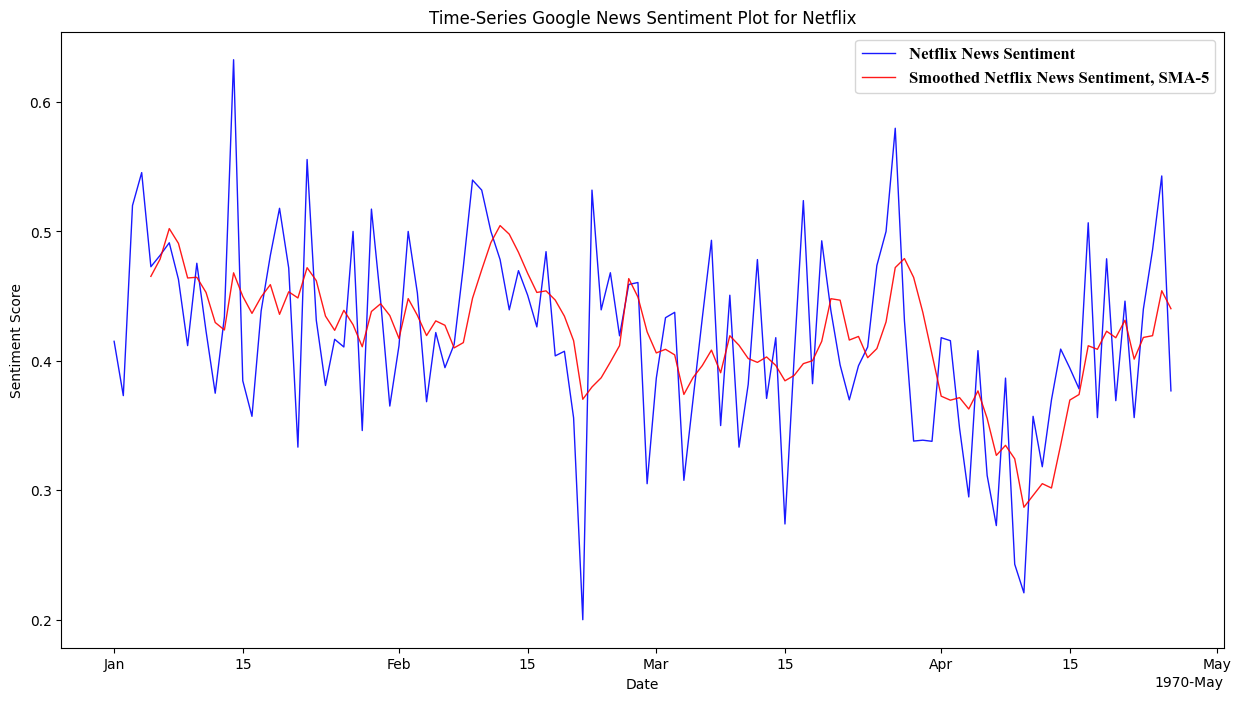

In [14]:
time_series = time_series_sentiment(df,query,5)

Function sentiment_returns_analysis takes in:

1) Target asset ticker code for comparison
2) time series fed out

and plots a graph to show the relationship between news sentiment and the asset returns.
Pearson correlation coefficient is given to reflect linear correlation between the two variables.

[*********************100%***********************]  1 of 1 completed


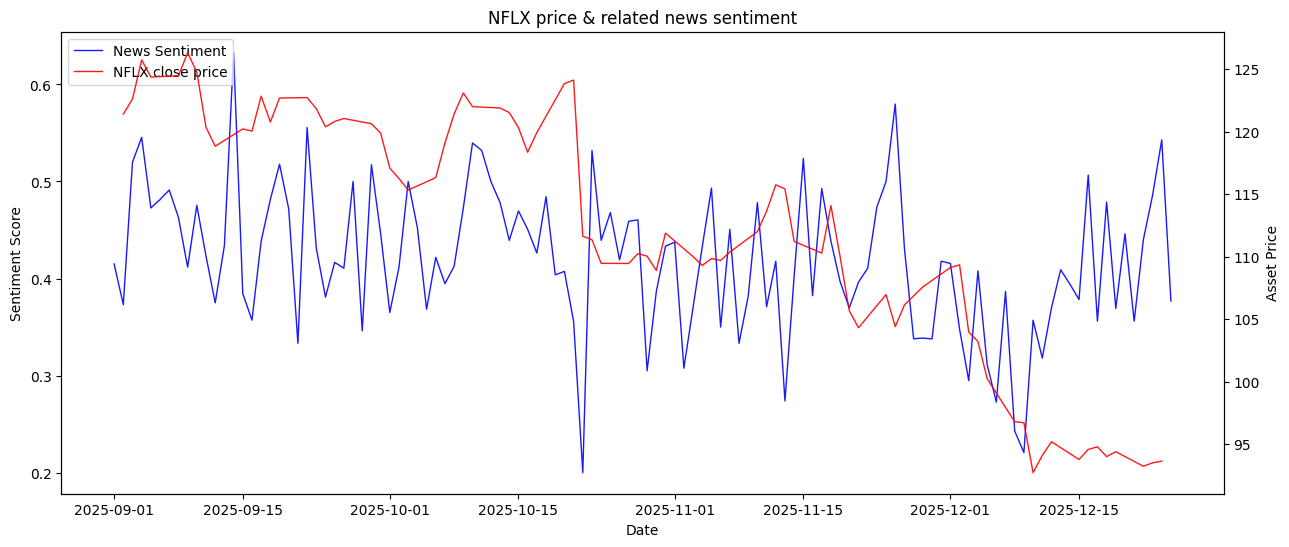

Correlation: 0.2705


,stock,sentiment
2025-09-02,121.411003,0.373134
2025-09-03,122.617996,0.520000
2025-09-04,125.748001,0.545455
2025-09-05,124.382004,0.472727
2025-09-08,124.475998,0.462963
...,...,...
2025-12-18,94.000000,0.478873
2025-12-19,94.389999,0.369231
2025-12-22,93.230003,0.440000
2025-12-23,93.500000,0.485714


In [15]:
ticker = "NFLX"
sentiment_returns_analysis(time_series, ticker)

Function news_count_series returns the number of related news (to the query) per day in the specified period.

In [4]:
news_count_series = get_daily_news_count("Netflix","2025-09-01","2025-12-10")


Function news_count_volatility_analysis takes in:

1) the news_count_series taken from the get_daily_news_count function that gives the number of related news per day in the specified period
2) target ticker

and feeds the Pearson's correlation coefficient between stock's absolute percentage return (volatility) and the number of news on a day.

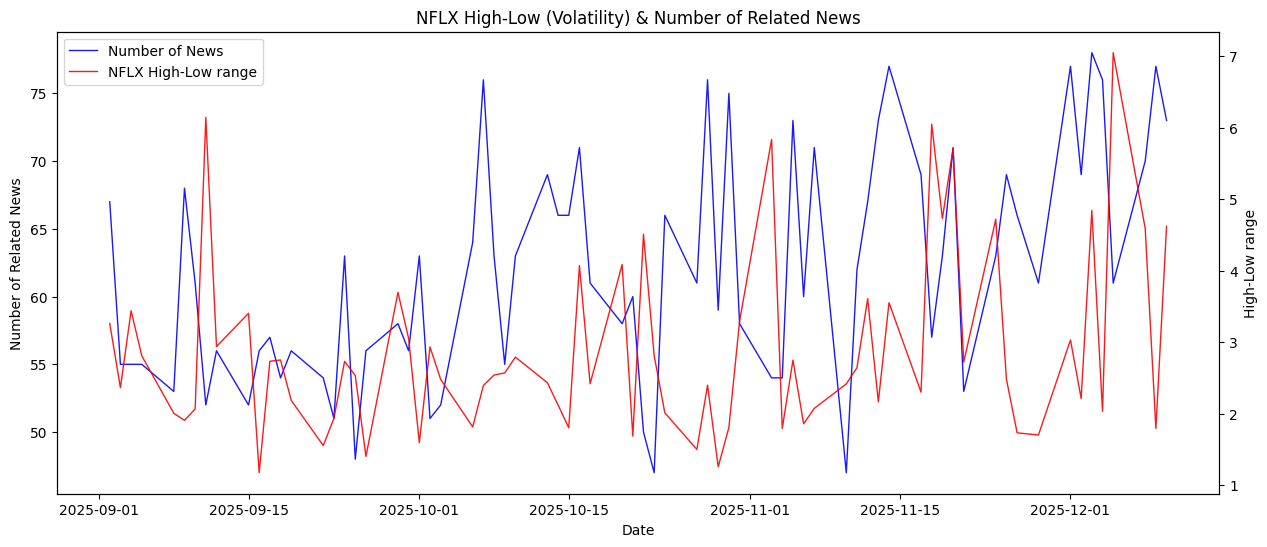

Correlation: -0.0088


,stock,Number of News
2025-09-02,3.260002,67
2025-09-03,2.362000,55
2025-09-04,3.439003,55
2025-09-05,2.807999,55
2025-09-08,2.004005,53
...,...,...
2025-12-04,2.030006,76
2025-12-05,7.050003,61
2025-12-08,4.589996,70
2025-12-09,1.790001,77


In [ ]:
df = news_count_volatility_analysis(news_count_series,"NFLX")